In [1]:
import numpy as np 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

px.set_mapbox_access_token("pk.eyJ1IjoibHVpemhlbWVsbyIsImEiOiJjbG9hZGN6Y3QwZmlkMmtwYmp1bmdlbTh0In0.4HnO4a5WCYU7fSjDt6fA-Q")

## Carrega os dados

In [2]:
def treat_relac(value, max=25):
    if value > max:
        return max
    if value < 0:
        return 0
    return value

df_pop_covid = pd.read_csv(f"../data/preprocessed_pop_covid.csv", index_col=0)
df_pop_covid["Relacao_perc_pop_covid"] = df_pop_covid["Relacao_perc_pop_covid"].apply(treat_relac)
df_pop_covid.columns = ['Municipio', 'Novos_casos', 'Populacao_estimada', 'Latitude',
                        'Longitude', 'Percentual de novos casos (%)']
df_pop_covid

Municipio  Novos_casos  Populacao_estimada   Latitude  \
0         abadia de goias         1238                9158 -16.758400   
1     abadia dos dourados          491                7022 -18.491119   
2               abadiania          412               20873 -16.194095   
3                  abaete         1411               23263 -19.156683   
4              abaetetuba         4805              160439  -1.721828   
...                   ...          ...                 ...        ...   
5283          xique xique         2053               46562 -10.821719   
5284               zabele           95                2269 -12.355532   
5285             zacarias          133                2784 -21.052365   
5286              ze doca         1523               52190  -3.270145   
5287               zortea          493                3432 -27.453536   

      Longitude  Percentual de novos casos (%)  
0    -49.438300                        13.5182  
1    -47.406359                         6.9923  
2    -48.706777                         1.9738  
3    -45.448121                         6.0654  
4    -48.878843                         2.9949  
...         ...                            ...  
5283 -42.726569                         4.4092  
5284 -41.664478                         4.1869  
5285 -50.051450                         4.7773  
5286 -45.655344                         2.9182  
5287 -51.553590                        14.3648  

[5288 rows x 6 columns]

In [3]:
df_meteorological = pd.read_csv(f"../data/data_meteorological.csv", index_col=0)
df_meteorological.columns = ['Municipio', 'Temperatura média em 2021', 'Latitude', 'Longitude']
df_meteorological

Municipio  Temperatura média em 2021   Latitude  Longitude
0       guarda mor                  23.356669 -17.561389 -47.199167
1          corumba                  26.282203 -18.996667 -57.637500
2       vila velha                  23.504628 -20.466944 -40.403889
3             tupa                  23.506298 -21.927251 -50.490251
4    rio brilhante                  23.428128 -21.774944 -54.528108
..             ...                        ...        ...        ...
583  campos lindos                  28.661224  -8.154722 -46.639444
584          barra                  27.322538 -11.084722 -43.138889
585       salvador                  25.592511 -13.005515 -38.505760
586        indaial                  21.290087 -26.913611 -49.268056
587       angelica                  23.858178 -22.148083 -53.763736

[492 rows x 4 columns]

## Visualização de temperatura

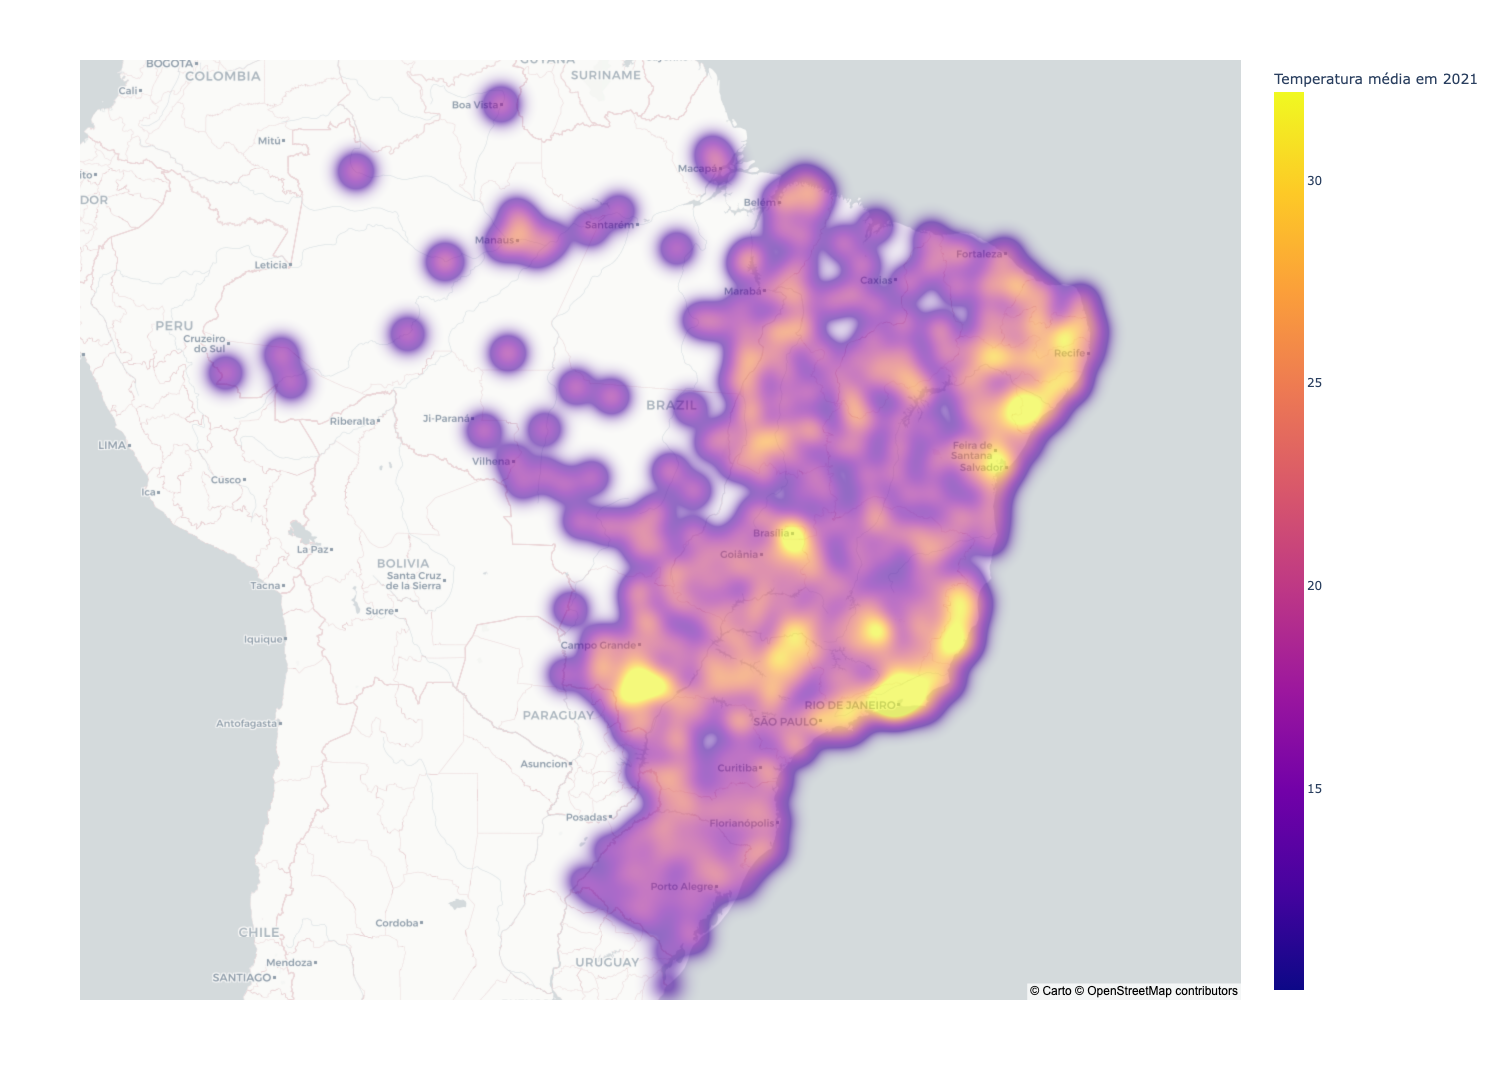

In [4]:
fig1 = px.density_mapbox(df_meteorological, lat = 'Latitude', lon = 'Longitude', z = 'Temperatura média em 2021',
                        radius = 35,
                        center = dict(lat = -15.685413, lon = -53.679588),
                        zoom = 4,
                        opacity=0.58,
                        width=1600,
                        height=1080,
                        mapbox_style = 'carto-positron')
fig1.show()

In [5]:
fig1.write_html("viz01.html")

## Visualização de novos casos

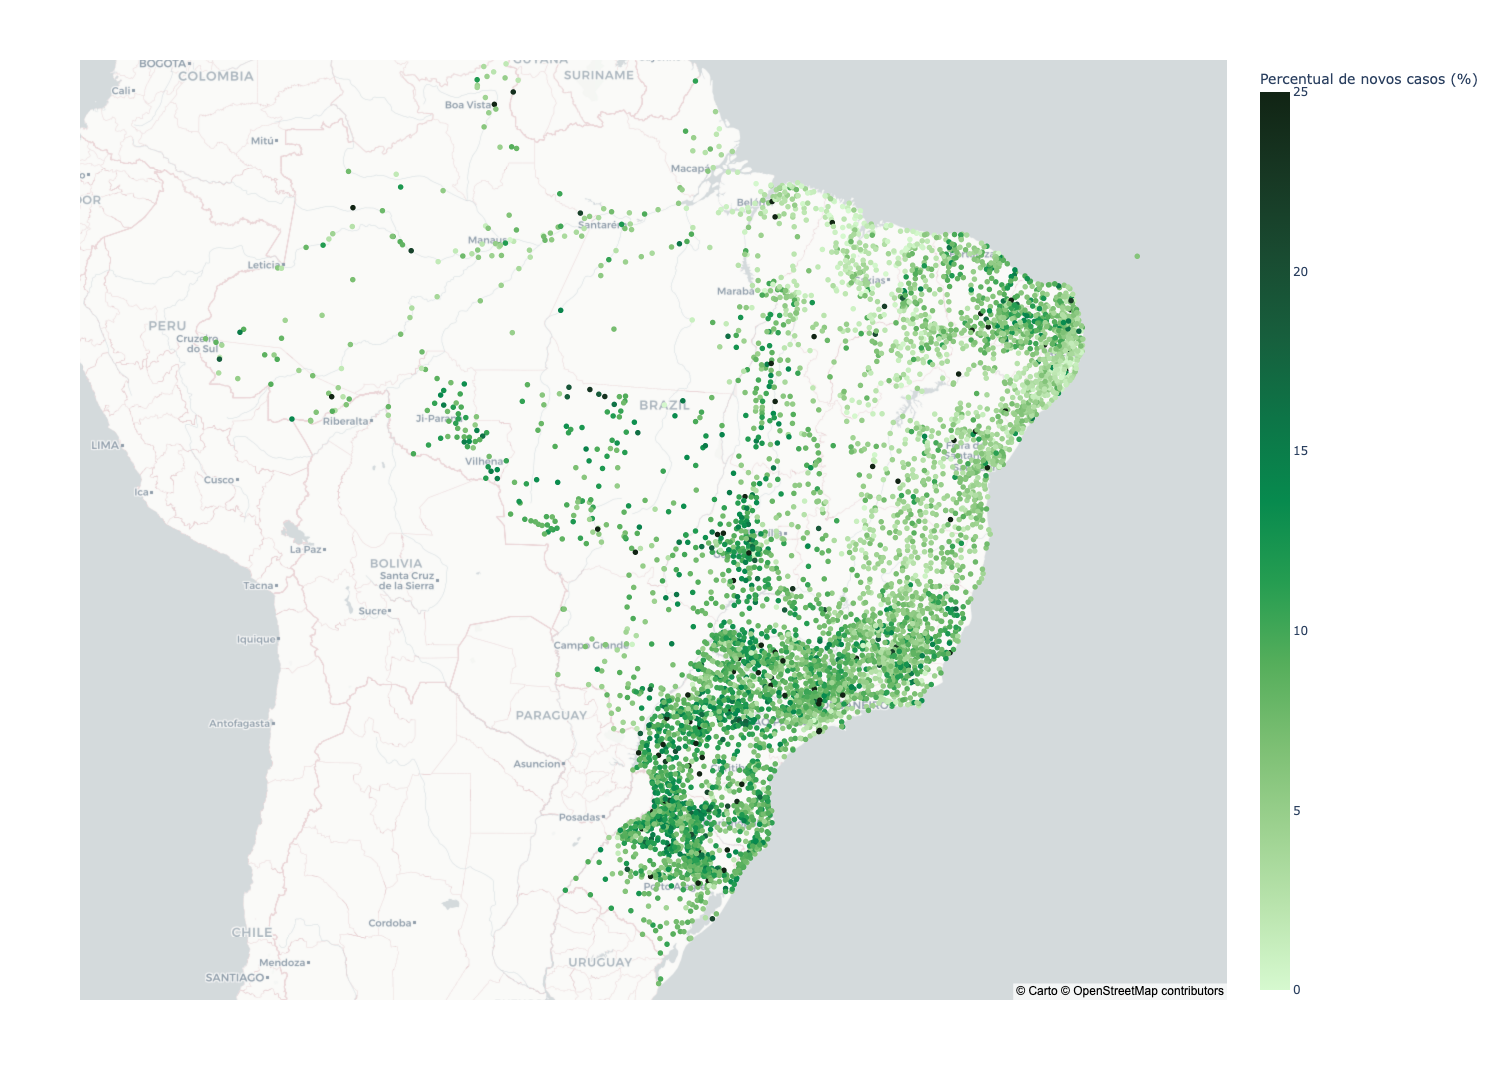

In [6]:
fig2 = px.scatter_mapbox(df_pop_covid,
                        lat="Latitude",
                        lon="Longitude",
                        color="Percentual de novos casos (%)",
                        size=None,
                        color_continuous_scale="Algae",
                        center = dict(lat = -15.685413, lon = -53.679588),
                        zoom=4,
                        width=1600,
                        height=1080,
                        mapbox_style = 'carto-positron')

fig2.show()

In [7]:
fig2.write_html("viz02.html")